サンプル画像 'input_image.jpg' を作成しました。


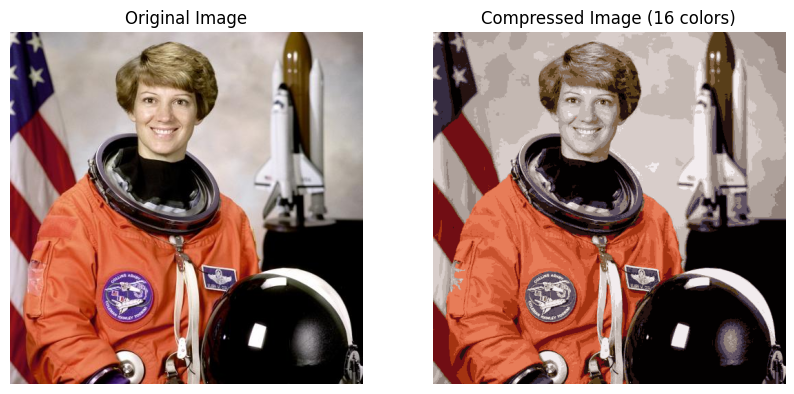

圧縮後の画像 'compressed_image.jpg' を保存しました。
オリジナル画像のエントロピー: 13.8156 bits
圧縮後画像のエントロピー: 3.7438 bits


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import data
from PIL import Image

# -------------------------
# 1. 写真っぽいサンプル画像を作成
# -------------------------

# skimageからサンプル画像（宇宙飛行士）を読み込む
astronaut = data.astronaut()  # (512, 512, 3)

# ndarrayをPIL Imageに変換して保存
input_image = Image.fromarray(astronaut)
input_image.save('input_image.jpg')
print("サンプル画像 'input_image.jpg' を作成しました。")

# -------------------------
# 2. 画像を読み込み、K平均法で圧縮
# -------------------------

# 画像を読み込む
image = Image.open('input_image.jpg')
image = image.convert('RGB')  # 念のためRGBに統一
image_np = np.array(image)

# 画像データを2次元配列に変換
w, h, d = image_np.shape
pixels = image_np.reshape((-1, 3))

# クラスター数を設定（色数）
k = 16  # 例：16色に圧縮

# K-meansクラスタリング
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# クラスタ中心に置き換え
new_colors = kmeans.cluster_centers_.astype(np.uint8)
new_pixels = new_colors[kmeans.labels_]

# 元の形に戻す
compressed_image = new_pixels.reshape((w, h, 3))

# -------------------------
# 3. 結果を表示
# -------------------------

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image_np)
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f'Compressed Image ({k} colors)')
plt.imshow(compressed_image)
plt.axis('off')

plt.show()

# 圧縮後の画像を保存
output_image = Image.fromarray(compressed_image)
output_image.save('compressed_image.jpg')
print("圧縮後の画像 'compressed_image.jpg' を保存しました。")

def calculate_entropy(image_array):
    """画像データ (numpy array) からエントロピーを計算"""
    if image_array.ndim == 3:
        # カラー画像なら、各チャンネルを連結
        pixels = image_array.reshape(-1, 3)
        pixels = [tuple(p) for p in pixels]
    else:
        # グレースケールならそのまま
        pixels = image_array.flatten()

    from collections import Counter
    counter = Counter(pixels)
    total_pixels = sum(counter.values())
    entropy = 0.0
    for count in counter.values():
        p = count / total_pixels
        entropy -= p * np.log2(p)
    return entropy

# エントロピーを計算して表示
entropy_original = calculate_entropy(image_np)
entropy_compressed = calculate_entropy(compressed_image)

print(f"オリジナル画像のエントロピー: {entropy_original:.4f} bits")
print(f"圧縮後画像のエントロピー: {entropy_compressed:.4f} bits")

